In [2]:
import numpy as np
import NR_a2_1_utils as utils
from matplotlib import pyplot as plt
from importlib import reload
from scipy import stats
import os
reload(utils)

<module 'NR_a2_1_utils' from 'C:\\Users\\Christiaan\\Desktop\\Numerical_Recipes\\a2\\NR_a2_1_utils.py'>

In [3]:
seed = 42
print('Original seed:',seed)

Original seed: 42


C:\Users\Christiaan\Desktop\Numerical_Recipes\a2\NR_a2_1_utils.py:16: RuntimeWarning: overflow encountered in longlong_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


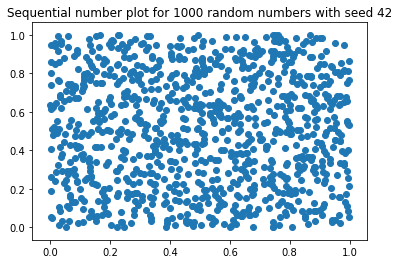

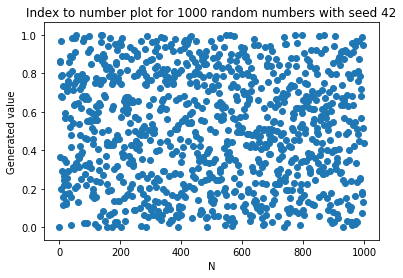

In [4]:
reload(utils)
rng = utils.rng(seed)
# Scatter plot
N = 1000 
rand = rng.rand_num(N)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
#plt.savefig('plots/1_a_1.png')
plt.show()
plt.scatter(np.arange(0,N,1),rand)
plt.title('Index to number plot for {} random numbers with seed {}'.format(1000,seed))
plt.xlabel('N')
plt.ylabel('Generated value')
plt.show()

Saving Histogram and scatter plot.


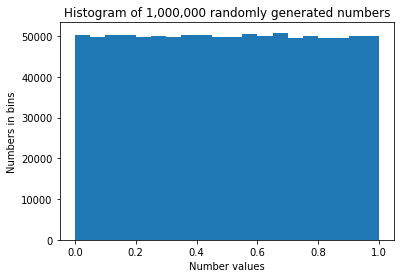

In [5]:
# Histogram
N = 1000000
rand = rng.rand_num(N)
plt.hist(rand,bins=20,range=(0,1))
plt.title('Histogram of 1,000,000 randomly generated numbers'.format(1000,seed))
plt.xlabel('Number values')
plt.ylabel('Numbers in bins')
plt.savefig('plots/1_b_2.png')
print('Saving Histogram and scatter plot.')

Saving Histogram.


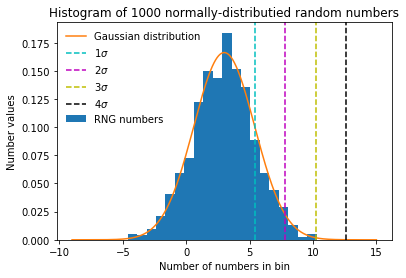

In [6]:
N = 1000
mu, sig = 3,2.4
rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
gauss = lambda x,mu,sig : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
x = np.linspace(mu-(sig*5),mu+(sig*5),1000)
plt.hist(rand[0],bins=20,label='RNG numbers',density=1)
plt.plot(x,gauss(x,mu,sig),label='Gaussian distribution')
plt.title('Histogram of {} normally-distributied random numbers'.format(1000))
plt.xlabel('Number of numbers in bin')
plt.ylabel('Number values')
plt.axvline(x=mu+sig,label='$1\sigma$',color='c',linestyle='--')
plt.axvline(x=mu+2*sig,label='$2\sigma$',color='m',linestyle='--')
plt.axvline(x=mu+3*sig,label='$3\sigma$',color='y',linestyle='--')
plt.axvline(x=mu+4*sig,label='$4\sigma$',color='k',linestyle='--')
plt.legend(frameon=False)
plt.savefig('plots/1_b_2.png')
print('Saving Histogram.')

In [7]:
#reload(utils)
#mu,sig = 0,1
#rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
#gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
#x,Fn,F,D,z = utils.KS_Kuip_test(rand[0],gauss,mu,sig)
#plt.plot(x,F)
#plt.plot(x,Fn)
#print(z)

In [8]:
reload(utils)
mu,sig = 0,1
rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
n = np.logspace(np.log10(10),np.log10(100000),dtype=int)
#print(len(n))
#print(n)
P = np.zeros(len(n))
P_s = np.zeros(len(n))
d = np.zeros(len(n))
d_s = np.zeros(len(n))
for i in range(len(n)):
    rand = utils.box_muller(rng.rand_num(n[i]),rng.rand_num(n[i]),mu,sig)
    #print(utils.KS_test(rand[0],gauss,mu,sig))
    d[i],P[i] = utils.KS_Kuip_test(rand[0],gauss,mu,sig)
    #z_s[i] = (n[i]**0.5+0.12+0.11*n[i]**(-0.5))*stats.kstest(rand[0],'norm')[0]
    d_s[i],P_s[i] = stats.kstest(rand[0],'norm')

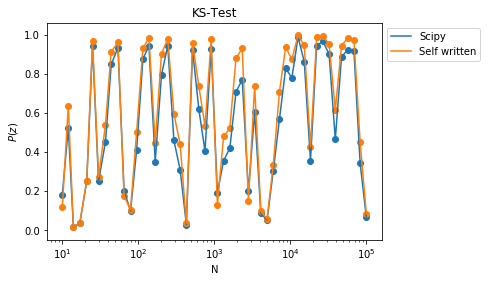

In [9]:
plt.plot(n,P_s,label='Scipy')
plt.scatter(n,P_s)
plt.plot(n,P,label='Self written')
plt.scatter(n,P)
plt.title('KS-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc=2, bbox_to_anchor=(1,1))

In [18]:
kuip_P = np.zeros(len(n))
kuip_P_s = np.zeros(len(n))
kuip_d = np.zeros(len(n))
kuip_d_s = np.zeros(len(n))
for i in range(len(n)):
    rand = utils.box_muller(rng.rand_num(n[i]),rng.rand_num(n[i]),mu,sig)
    kuip_d[i],kuip_P[i] = utils.KS_Kuip_test(rand[0],gauss,mu,sig,Kuip=True)
    kuip_d_s[i],kuip_P_s[i] = stats.kstest(rand[0],'norm')

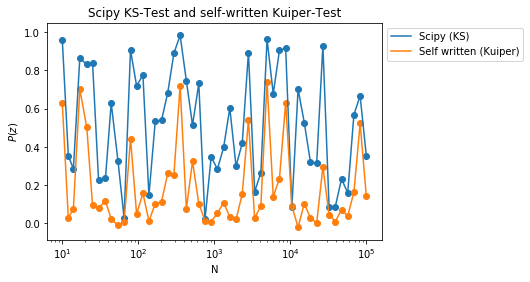

In [19]:
plt.plot(n,kuip_P_s,label='Scipy (KS)')
plt.scatter(n,kuip_P_s)
plt.plot(n,kuip_P,label='Self written (Kuiper)')
plt.scatter(n,kuip_P)
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc=2, bbox_to_anchor=(1,1))


In [20]:
filename = 'randomnumbers.txt'
url = 'https://home.strw.leidenuniv.nl/~nobels/coursedata/'
if not os.path.isfile(filename):
    print(f'File not found, downloading {filename}')
    os.system('wget '+url+filename)

In [21]:
random_num = np.genfromtxt(filename,delimiter=' ',skip_footer=1)

In [22]:
print(len(random_num))

99999


In [23]:
n = np.logspace(np.log10(10),np.log10(len(random_num)),dtype=int)

test_P,test_D = np.zeros((10,len(n)),dtype=list),np.zeros((10,len(n)),dtype=list)

for i in range(10):
    for j in range(len(n)):
        rand = np.array(random_num[:n[j],i])
        test_D[i][j],test_P[i][j] = utils.KS_Kuip_test(rand,gauss,mu,sig,Kuip=True)
    

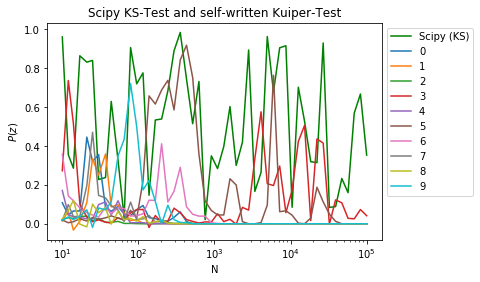

In [24]:
plt.plot(n,kuip_P_s,label='Scipy (KS)',color = 'g')
#plt.scatter(n,kuip_P_s,marker='.',color='grey')
for i in range(10):
    plt.plot(n,test_P[i],label = i)
#plt.plot(n,kuip_P,label='Self written')
#plt.scatter(n,kuip_P)
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc=2, bbox_to_anchor=(1,1))

## 2. Making an initial density field

In [29]:
reload(utils)
N = 1024
df1 = utils.random_field_generator(-1,N,rng)
df1_inft = np.fft.ifft2(df1)
df2 = utils.random_field_generator(-2,N,rng)
df2_inft = np.fft.ifft2(df2)
df3 = utils.random_field_generator(-3,N,rng)
df3_inft = np.fft.ifft2(df3)

Generating a random field with n = -1 of dimension 1024x1024 (mu = 0)
Generating a random field with n = -2 of dimension 1024x1024 (mu = 0)
Generating a random field with n = -3 of dimension 1024x1024 (mu = 0)


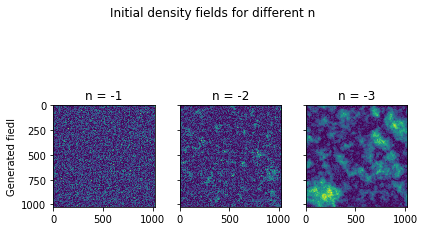

In [30]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3,sharex='col', sharey='row')
ax1.set(title='n = -1')
ax1.imshow(np.abs(df1_inft))
ax1.set(ylabel='Generated fiedl')
ax2.set(title='n = -2')
ax2.imshow(np.abs(df2_inft ))
ax3.set(title='n = -3')
ax3.imshow(np.abs(df3_inft ))
fig.suptitle('Initial density fields for different n',y=1.02)
fig.tight_layout()
